<a href="https://colab.research.google.com/github/vmanriq/ann-t1/blob/master/Tarea1Ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds

from tensorflow import keras
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

import numpy as np
import pandas as pd
import seaborn as sn
from matplotlib import pyplot as plt

import cv2
import os
import pickle
import random
import collections

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, multilabel_confusion_matrix

In [0]:
PATH = "/content/gdrive/My Drive/ANN1"
np.random.seed(48)
tf.random.set_seed(48)
plt.style.use("fivethirtyeight")
%cd /content/gdrive/My Drive/ANN1

/content/gdrive/My Drive/ANN1


## Ejercicio 1: Refute o Afirme (El desbalanceo de las clases no tiene ningun efecto en el entrenamiento de la red)



## PERROS&GATOS DATASET

### Cargado del dataset

In [0]:
##shuffle dataset
def shuffleImages(img_array, labels):
  aux_arr = []
  X = []
  y = []
  for i in range(len(labels)):
    aux_arr.append([img_array[i], labels[i]])
  random.shuffle(aux_arr)
  for img_arr, lab in aux_arr:
    X.append(img_arr)
    y.append(lab)
  return (np.array(X),np.array(y))

def calcCantGatosPerros(X, y, alpha, total):
  
  cant_perros = int(len(X)/2)*alpha
  cant_gatos = total - cant_perros
  
  return(cant_gatos ,cant_perros )

def minData(X, y, ngatos, nperros):
  if(nperros+ngatos > len(X)):
    return
  newX = []
  newy = []
  cant_perros = ngatos
  cant_gatos = nperros
  countg = 0
  countp = 0
  for idx, elem in enumerate(y):
    #gato
    if( elem == 0 and countg <= cant_gatos):
      newX.append(X[idx])
      newy.append(y[idx])
      countg+=1

    if( elem == 1 and countp <= cant_perros):
      newX.append(X[idx])
      newy.append(y[idx])
      countp+=1
  print(countp+countg)
  return(np.array(newX), np.array(newy))

In [0]:
#se realizo pre-procesamiento de las imagenes, dejandolas todas en la misma escala, adicionalmente se dejaron en escala de grises, ya que el color no se presenta como una caracteristica importante en esta clasificacion 
img_array = pickle.load(open(os.path.join(PATH,"PetImages","X3.pickle"),"rb"))
labels = pickle.load(open(os.path.join(PATH,"PetImages","y3.pickle"),"rb"))
NAMES  = ["Perro","Gato"]
EPOCHS = 10

In [0]:
X, y = shuffleImages(img_array, labels)

#### Se separa data en training y testing 

In [0]:
#20% testing 80% training 
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y,test_size=0.20, random_state=42)

### Se desbalancea el testing, manteniendo constante 10000 muestras 

10001


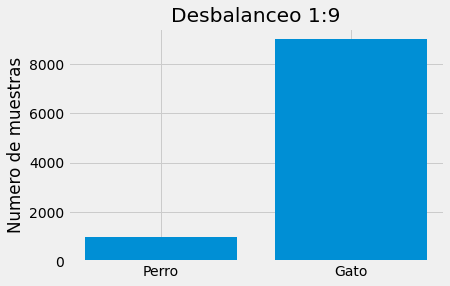

In [0]:
#se eliminan elementos de la clase perro, para desbalancear el testing--- Se mantiene una suma constante de 10000 muestras en el dataset de training 
ngatos, nperros = calcCantGatosPerros(X_train, y_train, 0.1, 10000)
desbX, desby = minData(X_train, y_train, ngatos, nperros)
perros,gatos = collections.Counter(desby).items()
plt.ylabel("Numero de muestras")
plt.title("Desbalanceo 1:9")
plt.bar(NAMES,[perros[1],gatos[1]])
plt.show()

In [0]:
##Arquitectura 
model1 = keras.models.Sequential()

model1.add(keras.layers.Conv2D(32, (3,3), input_shape = X.shape[1:], activation="relu",))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model1.add( keras.layers.Conv2D(64, (3,3),  activation="relu"))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model1.add( keras.layers.Conv2D(128, (3,3),  activation="relu"))
model1.add(keras.layers.Dropout(0.25))
model1.add(keras.layers.MaxPooling2D(pool_size=(2,2)))


model1.add( keras.layers.Flatten())

model1.add( keras.layers.Dense(512, activation="relu"))
model1.add(keras.layers.Dropout(0.5))

model1.add( keras.layers.Dense(1, activation="sigmoid"))


model1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [0]:
# se entrena red con dataset desbalanceados 1 
history = model1.fit(desbX, desby , batch_size=34, epochs=EPOCHS, validation_split=0.2)

Epoch 1/10
236/236 [==============================] - 3s 13ms/step - loss: 0.2903 - accuracy: 0.8916 - val_loss: 0.1846 - val_accuracy: 0.9925
Epoch 2/10
236/236 [==============================] - 3s 13ms/step - loss: 0.2820 - accuracy: 0.8974 - val_loss: 0.1909 - val_accuracy: 0.9970
Epoch 3/10
236/236 [==============================] - 3s 13ms/step - loss: 0.2583 - accuracy: 0.9090 - val_loss: 0.1598 - val_accuracy: 0.9930
Epoch 4/10
236/236 [==============================] - 3s 13ms/step - loss: 0.2388 - accuracy: 0.9131 - val_loss: 0.1775 - val_accuracy: 0.9845
Epoch 5/10
236/236 [==============================] - 3s 13ms/step - loss: 0.2147 - accuracy: 0.9209 - val_loss: 0.1815 - val_accuracy: 0.9900
Epoch 6/10
236/236 [==============================] - 3s 13ms/step - loss: 0.2132 - accuracy: 0.9247 - val_loss: 0.1308 - val_accuracy: 0.9945
Epoch 7/10
236/236 [==============================] - 3s 13ms/step - loss: 0.1802 - accuracy: 0.9354 - val_loss: 0.1164 - val_accuracy: 0.9905

              precision    recall  f1-score   support

       Perro       0.17      0.87      0.28       475
        Gato       0.98      0.54      0.69      4515

    accuracy                           0.57      4990
   macro avg       0.57      0.71      0.49      4990
weighted avg       0.90      0.57      0.66      4990



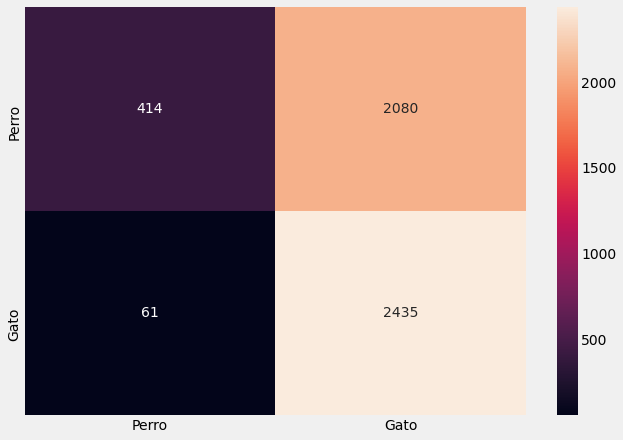

In [0]:
#desbalanceado sobre testing
y_predict = (model1.predict(X_test)>0.5).astype(int)
print(classification_report(y_predict, y_test, target_names = NAMES))
df_cm = pd.DataFrame(confusion_matrix(y_test, y_predict), index = NAMES,
                  columns = NAMES)
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt="g")

### Desbalanceo 2

10001


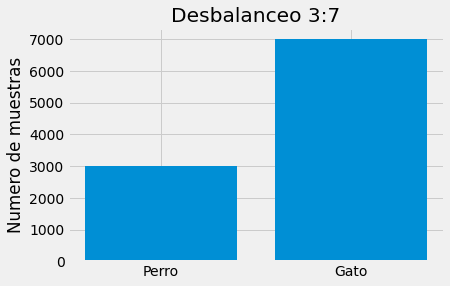

In [0]:
ngatos, nperros = calcCantGatosPerros(X_train, y_train, 0.3, 10000)
desbX2, desby2 = minData(X_train, y_train, ngatos, nperros)
perros,gatos = collections.Counter(desby2).items()
plt.ylabel("Numero de muestras")
plt.title("Desbalanceo 3:7")
plt.bar(NAMES,[perros[1],gatos[1]])
plt.show()

In [0]:
model2= keras.models.clone_model(model1)

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model2.fit(desbX2, desby2 , batch_size=34, epochs=EPOCHS, validation_split=0.2)

Epoch 1/10
236/236 [==============================] - 3s 13ms/step - loss: 3.8853 - accuracy: 0.6174 - val_loss: 0.4786 - val_accuracy: 1.0000
Epoch 2/10
236/236 [==============================] - 3s 13ms/step - loss: 0.6536 - accuracy: 0.6283 - val_loss: 0.4383 - val_accuracy: 0.9965
Epoch 3/10
236/236 [==============================] - 3s 13ms/step - loss: 0.6492 - accuracy: 0.6311 - val_loss: 0.4758 - val_accuracy: 0.9750
Epoch 4/10
236/236 [==============================] - 3s 13ms/step - loss: 0.6448 - accuracy: 0.6350 - val_loss: 0.4901 - val_accuracy: 0.9690
Epoch 5/10
236/236 [==============================] - 3s 13ms/step - loss: 0.6269 - accuracy: 0.6496 - val_loss: 0.4717 - val_accuracy: 0.9575
Epoch 6/10
236/236 [==============================] - 3s 13ms/step - loss: 0.6263 - accuracy: 0.6472 - val_loss: 0.4386 - val_accuracy: 0.9760
Epoch 7/10
236/236 [==============================] - 3s 13ms/step - loss: 0.6097 - accuracy: 0.6656 - val_loss: 0.4530 - val_accuracy: 0.9280

In [0]:
#desbalanceado sobre testing
y_predict = (model2.predict(X_test)>0.5).astype(int)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, target_names = NAMES))

[[ 480 2014]
 [ 169 2327]]
              precision    recall  f1-score   support

       Perro       0.74      0.19      0.31      2494
        Gato       0.54      0.93      0.68      2496

    accuracy                           0.56      4990
   macro avg       0.64      0.56      0.49      4990
weighted avg       0.64      0.56      0.49      4990



### Full dataset

10002


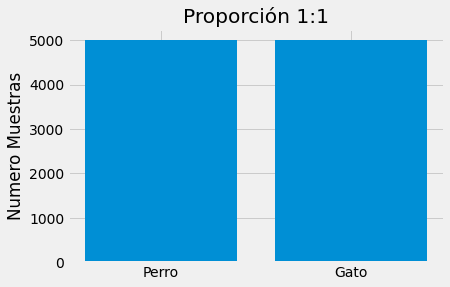

In [0]:
X_full_train, y_full_train = minData(X_train, y_train, 5000, 5000)
perros,gatos = collections.Counter(y_full_train).items()
plt.ylabel("Numero Muestras")
plt.title("Proporción 1:1")
plt.bar(NAMES ,[perros[1],gatos[1]])
plt.show()

In [0]:
model3= keras.models.clone_model(model1)

model3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history = model3.fit(X_full_train/255.0, y_full_train , batch_size=34, epochs=EPOCHS, validation_split=0.2)

Epoch 1/10
236/236 [==============================] - 3s 14ms/step - loss: 0.6844 - accuracy: 0.5524 - val_loss: 0.6550 - val_accuracy: 0.6457
Epoch 2/10
236/236 [==============================] - 3s 14ms/step - loss: 0.6476 - accuracy: 0.6289 - val_loss: 0.6226 - val_accuracy: 0.6847
Epoch 3/10
236/236 [==============================] - 3s 14ms/step - loss: 0.5940 - accuracy: 0.6857 - val_loss: 0.5681 - val_accuracy: 0.7176
Epoch 4/10
236/236 [==============================] - 3s 14ms/step - loss: 0.5321 - accuracy: 0.7384 - val_loss: 0.5337 - val_accuracy: 0.7641
Epoch 5/10
236/236 [==============================] - 3s 14ms/step - loss: 0.4822 - accuracy: 0.7717 - val_loss: 0.4974 - val_accuracy: 0.7676
Epoch 6/10
236/236 [==============================] - 3s 14ms/step - loss: 0.4199 - accuracy: 0.8059 - val_loss: 0.4921 - val_accuracy: 0.7716
Epoch 7/10
236/236 [==============================] - 3s 14ms/step - loss: 0.3501 - accuracy: 0.8443 - val_loss: 0.4485 - val_accuracy: 0.7926

In [0]:
y_predict = (model3.predict(X_test/255.0)>0.5).astype(int)
print(confusion_matrix(y_test, y_predict))
print(accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict, target_names=["perro","gato"]))


[[2042  452]
 [ 597 1899]]
0.7897795591182365
              precision    recall  f1-score   support

       perro       0.77      0.82      0.80      2494
        gato       0.81      0.76      0.78      2496

    accuracy                           0.79      4990
   macro avg       0.79      0.79      0.79      4990
weighted avg       0.79      0.79      0.79      4990



## Resultados

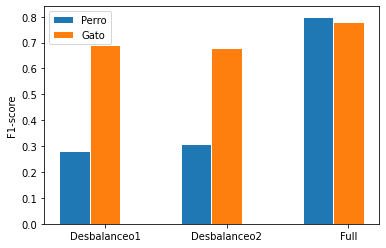

In [0]:
# set width of bar
barWidth = 0.25
 
# set height of bar
##meter los fscore 
perro = [0.28, 0.31, 0.80]
gato = [0.69, 0.68, 0.78]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.bar(r1, perro, width=barWidth, edgecolor='white', label='Perro')
plt.bar(r2, gato, width=barWidth, edgecolor='white', label='Gato')
 
# Add xticks on the middle of the group bars
plt.xticks([r + barWidth for r in range(len(perro))], ["Desbalanceo1","Desbalanceo2", "Full"])
 
# Create legend & Show graphic
plt.ylabel("F1-score")
plt.legend()
plt.show()


## CIFAR10 DATASET

#### Convolutional Model CIFAR10



In [0]:
from keras.datasets import cifar10

In [0]:
#FUNCION PARA DESBALANCEAR CLASES 
#DESBALANCEA LA CALSE {6,5,4,3}
def minDataCifar10(X, y, nGrandes, nChicos):
  newX = []
  newy = []

  contL = [0,0,0,0,0,0,0,0,0,0]

  for idx, elem in enumerate(y):
    # gato
    elem = elem[0]
    if( elem == 6 or elem == 4 or elem == 3 or elem == 5):

      if( contL[elem] <= nChicos ) and (elem == 5):
        newX.append(X[idx])
        newy.append(y[idx])
        contL[elem] += 1
      if( contL[elem] <= nChicos ) and (elem == 4):
        newX.append(X[idx])
        newy.append(y[idx])
        contL[elem] += 1
      if( contL[elem] <= nChicos ) and (elem == 3):
        newX.append(X[idx])
        newy.append(y[idx])
        contL[elem] += 1
      if( contL[elem] <= nChicos ) and (elem == 6):
        newX.append(X[idx])
        newy.append(y[idx])
        contL[elem] += 1
    else:
      if( contL[elem] <= nGrandes):
        newX.append(X[idx])
        newy.append(y[idx])
        contL[elem] += 1
  print( sum(contL) )
  return(np.array(newX), np.array(newy))

In [0]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170500096/170498071 [==============================] - 2s 0us/step


<BarContainer object of 10 artists>

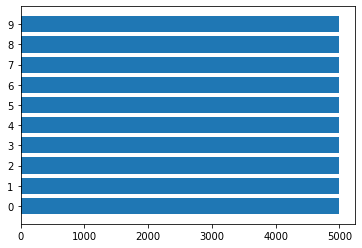

In [0]:
(unique, counts) = np.unique(y_train, return_counts=True)
labels = list(map(str,unique.tolist()))
freq = list(map(int, counts.tolist()))
plt.barh(labels, freq)

In [0]:
### Se normalizan  los datos

x_train = x_train.astype(np.float64)/255.0
x_test = x_test.astype(np.float64)/255.0


In [0]:
## arquitectura
modelcifar10 = keras.models.Sequential()

modelcifar10.add(keras.layers.Conv2D(32, (3,3), input_shape = x_train.shape[1:], activation="relu", padding="same"))
modelcifar10.add(keras.layers.Conv2D(32, (3,3), activation="relu", padding="same"))
modelcifar10.add(keras.layers.BatchNormalization())
modelcifar10.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

modelcifar10.add(keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
modelcifar10.add(keras.layers.Conv2D(64, (3,3), activation="relu", padding="same"))
modelcifar10.add(keras.layers.BatchNormalization())
modelcifar10.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

modelcifar10.add(keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
modelcifar10.add(keras.layers.Conv2D(128, (3,3), activation="relu", padding="same"))
modelcifar10.add(keras.layers.BatchNormalization())
modelcifar10.add(keras.layers.MaxPooling2D(pool_size=(2,2)))



modelcifar10.add(keras.layers.Flatten())
modelcifar10.add(keras.layers.Dense(512, activation="relu"))
modelcifar10.add(keras.layers.Dropout(0.5))
modelcifar10.add(keras.layers.Dense(10, activation="softmax"))

modelcifar10.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

### Full DataSet

26010


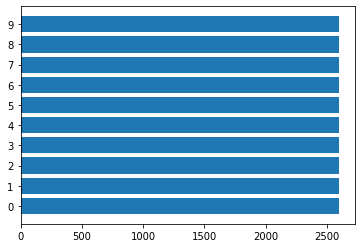

In [0]:
cifar10Full= keras.models.clone_model(modelcifar10)

cifar10Full.compile(optimizer="adam",
              loss="categorical_crossentropy",
              metrics=["accuracy"])
#se reduce el dataset para dejar la suma constante  
x_full, y_full = minDataCifar10(x_train, y_train, 2600, 2600)

(unique, counts) = np.unique(y_full, return_counts=True)
labels = list(map(str,unique.tolist()))
freq = list(map(int, counts.tolist()))
plt.barh(labels, freq)


#one hot 
y_full = keras.utils.to_categorical(y_full)
y_test = keras.utils.to_categorical(y_test)

In [0]:
#se entrena el modelo
cifar10Full.fit(x_full, y_full, batch_size=34, validation_split=0.2, epochs=30)

Epoch 1/30
612/612 [==============================] - 4s 7ms/step - loss: 1.7634 - accuracy: 0.3759 - val_loss: 1.4964 - val_accuracy: 0.4796
Epoch 2/30
612/612 [==============================] - 4s 7ms/step - loss: 1.3430 - accuracy: 0.5234 - val_loss: 1.1885 - val_accuracy: 0.5761
Epoch 3/30
612/612 [==============================] - 4s 7ms/step - loss: 1.1220 - accuracy: 0.6081 - val_loss: 1.1585 - val_accuracy: 0.5827
Epoch 4/30
612/612 [==============================] - 4s 7ms/step - loss: 0.9794 - accuracy: 0.6582 - val_loss: 1.1823 - val_accuracy: 0.5796
Epoch 5/30
612/612 [==============================] - 4s 7ms/step - loss: 0.8660 - accuracy: 0.6996 - val_loss: 1.0211 - val_accuracy: 0.6547
Epoch 6/30
612/612 [==============================] - 4s 7ms/step - loss: 0.7677 - accuracy: 0.7348 - val_loss: 0.8777 - val_accuracy: 0.7043
Epoch 7/30
612/612 [==============================] - 4s 7ms/step - loss: 0.6752 - accuracy: 0.7697 - val_loss: 0.8585 - val_accuracy: 0.7184
Epoch 

In [0]:
# sobre testing
y_predict = cifar10Full.predict(x_test)
print(classification_report(np.argmax(y_test,axis=1), np.argmax(y_predict,axis=1)))

              precision    recall  f1-score   support

           0       0.80      0.76      0.78      1000
           1       0.90      0.84      0.87      1000
           2       0.75      0.54      0.62      1000
           3       0.50      0.59      0.54      1000
           4       0.72      0.65      0.68      1000
           5       0.58      0.69      0.63      1000
           6       0.84      0.75      0.79      1000
           7       0.69      0.85      0.76      1000
           8       0.90      0.81      0.86      1000
           9       0.79      0.86      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.75      0.73      0.74     10000
weighted avg       0.75      0.73      0.74     10000



### Desbalanceo 1


26010


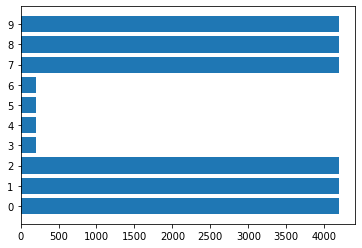

In [0]:
cifar10Des1= keras.models.clone_model(modelcifar10)

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype(np.float64)/255.0
x_test = x_test.astype(np.float64)/255.0



desX, desy = minDataCifar10(x_train, y_train, 4200, 200)

(unique, counts) = np.unique(desy, return_counts=True)
labels = list(map(str,unique.tolist()))
freq = list(map(int, counts.tolist()))
plt.barh(labels, freq)

y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

desy = keras.utils.to_categorical(desy)

In [0]:
cifar10Des1.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])
cifar10Des1.fit(desX, desy, batch_size=34, validation_split=0.2, epochs=30)

Epoch 1/30
612/612 [==============================] - 4s 7ms/step - loss: 1.3999 - accuracy: 0.5326 - val_loss: 0.8809 - val_accuracy: 0.6911
Epoch 2/30
612/612 [==============================] - 4s 7ms/step - loss: 0.9445 - accuracy: 0.6872 - val_loss: 0.8256 - val_accuracy: 0.7120
Epoch 3/30
612/612 [==============================] - 4s 7ms/step - loss: 0.7605 - accuracy: 0.7482 - val_loss: 0.7204 - val_accuracy: 0.7512
Epoch 4/30
612/612 [==============================] - 4s 7ms/step - loss: 0.6534 - accuracy: 0.7869 - val_loss: 0.6030 - val_accuracy: 0.7868
Epoch 5/30
612/612 [==============================] - 4s 7ms/step - loss: 0.5659 - accuracy: 0.8154 - val_loss: 0.7831 - val_accuracy: 0.7470
Epoch 6/30
612/612 [==============================] - 4s 7ms/step - loss: 0.4983 - accuracy: 0.8343 - val_loss: 0.7079 - val_accuracy: 0.7762
Epoch 7/30
612/612 [==============================] - 4s 7ms/step - loss: 0.4341 - accuracy: 0.8558 - val_loss: 0.5022 - val_accuracy: 0.8420
Epoch 

In [0]:
y_predict = cifar10Des1.predict(x_test)
print(confusion_matrix(  np.argmax(y_test, axis=1), np.argmax(y_predict,axis=1) ))
print(classification_report( np.argmax(y_test, axis=1) , np.argmax(y_predict,axis=1)))

[[851  14  53   4   1   1   3  20  23  30]
 [  9 922   5   2   0   0   1   4   5  52]
 [ 64  12 803   7   5  19  10  65   5  10]
 [ 79  27 316 166   7 161  17 172  18  37]
 [ 65  12 397  29 127  40   9 304   6  11]
 [ 33   3 239  86   6 378   4 226   6  19]
 [ 17  24 374  45   4  45 390  60  10  31]
 [ 14   3  41   6   0  18   0 908   2   8]
 [ 69  40  22   3   0   3   1  13 824  25]
 [ 19  89  12   3   0   3   2  25   8 839]]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77      1000
           1       0.80      0.92      0.86      1000
           2       0.35      0.80      0.49      1000
           3       0.47      0.17      0.25      1000
           4       0.85      0.13      0.22      1000
           5       0.57      0.38      0.45      1000
           6       0.89      0.39      0.54      1000
           7       0.51      0.91      0.65      1000
           8       0.91      0.82      0.86      1000
           9       0.79     

### Resultados

## TwoMoon Dataset

In [0]:
def minDataMOONS(X, y, nGrande, nChico):
  newX = []
  newy = []
  countg = [0,0]
  for idx, elem in enumerate(y):
    if( elem == 0 and countg[elem] <= nGrande):
      newX.append(X[idx])
      newy.append(y[idx])
      countg[elem]+=1

    if( elem == 1 and countg[elem] <= nChico):
      newX.append(X[idx])
      newy.append(y[idx])
      countg[elem]+=1
  print(sum(countg))
  return(np.array(newX), np.array(newy))

In [0]:
X,y = make_moons(n_samples = 4000, noise = 0.08)

# Separar Data train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [0]:
# ARQUITECTURA
model2MOONS = keras.models.Sequential()
model2MOONS.add(keras.layers.Dense(4, input_dim=2, kernel_initializer='normal', activation='tanh'))
model2MOONS.add(keras.layers.Dense(2, activation='tanh'))
model2MOONS.add(keras.layers.Dense(1, activation='sigmoid'))

model2MOONS.compile( optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model2MOONS.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_37 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_38 (Dense)             (None, 1)                 3         
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Full Dataset

1002


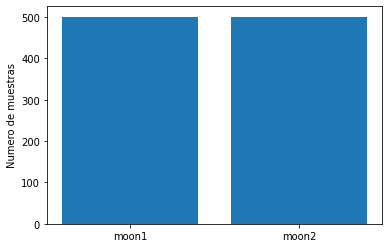

In [0]:
fullX, fully = minDataMOONS(X_train, y_train, 500,500)
moon1,moon2 = collections.Counter(fully).items()
plt.ylabel("Numero de muestras")
plt.bar(['moon1','moon2'],[moon1[1],moon2[1]])
plt.show()

In [0]:
model2MOONS_FULL= keras.models.clone_model(model2MOONS)
model2MOONS_FULL.compile( optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history2MOONS = model2MOONS_FULL.fit(fullX, fully, epochs= 10, batch_size = 34, validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 0s 7ms/step - loss: 0.6983 - accuracy: 0.2634 - val_loss: 0.6936 - val_accuracy: 0.4428
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6886 - accuracy: 0.6667 - val_loss: 0.6844 - val_accuracy: 0.8408
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.8252 - val_loss: 0.6739 - val_accuracy: 0.8706
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6660 - accuracy: 0.8315 - val_loss: 0.6587 - val_accuracy: 0.8507
Epoch 5/10
24/24 [==============================] - 0s 3ms/step - loss: 0.6490 - accuracy: 0.8340 - val_loss: 0.6386 - val_accuracy: 0.8458
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6277 - accuracy: 0.8190 - val_loss: 0.6137 - val_accuracy: 0.8458
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6029 - accuracy: 0.8202 - val_loss: 0.5863 - val_accuracy: 0.8458
Epoch 8/10
24/24 [==

In [0]:
#desbalanceado sobre testing
y_predict = (model2MOONS_FULL.predict(X_test)>0.5).astype(int)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict))

[[795 207]
 [145 853]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1002
           1       0.80      0.85      0.83       998

    accuracy                           0.82      2000
   macro avg       0.83      0.82      0.82      2000
weighted avg       0.83      0.82      0.82      2000



### Desbalanceo 1

1002


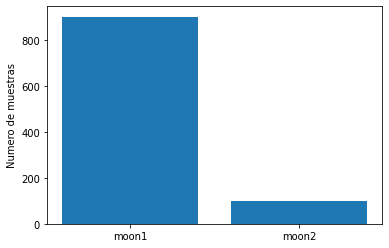

(1, 101)


In [0]:
NAMES = ["moon1","moon2"]
desbX, desby = minDataMOONS(X_train, y_train, 900,100)
moon2,moon1 = collections.Counter(desby).items()
plt.ylabel("Numero de muestras")
plt.bar(NAMES ,[moon1[1],moon2[1]])
plt.show()
print(moon2)

In [0]:
model2MOONS_SPLIT2= keras.models.clone_model(model2MOONS)
model2MOONS_SPLIT2.compile( optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history2MOONS_SPLIT = model2MOONS_SPLIT2.fit(desbX, desby, epochs= 10, batch_size = 34, validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 0s 7ms/step - loss: 0.6842 - accuracy: 0.5968 - val_loss: 0.6272 - val_accuracy: 1.0000
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6049 - accuracy: 0.8851 - val_loss: 0.5361 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5336 - accuracy: 0.8739 - val_loss: 0.4501 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.8739 - val_loss: 0.3748 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.4170 - accuracy: 0.8739 - val_loss: 0.3125 - val_accuracy: 1.0000
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.3748 - accuracy: 0.8752 - val_loss: 0.2645 - val_accuracy: 1.0000
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.3421 - accuracy: 0.8777 - val_loss: 0.2284 - val_accuracy: 1.0000
Epoch 8/10
24/24 [==

In [0]:
#desbalanceado sobre testing
y_predict = (model2MOONS_SPLIT2.predict(X_test)>0.5).astype(int)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, target_names=NAMES))

[[1002    0]
 [ 622  376]]
              precision    recall  f1-score   support

       moon1       0.62      1.00      0.76      1002
       moon2       1.00      0.38      0.55       998

    accuracy                           0.69      2000
   macro avg       0.81      0.69      0.66      2000
weighted avg       0.81      0.69      0.66      2000



### Desbalanceo 2

1002


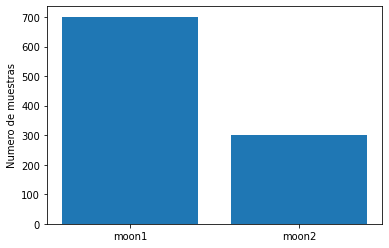

(1, 301)


In [0]:
NAMES = ["moon1","moon2"]
desbX2, desby2 = minDataMOONS(X_train, y_train, 700,300)
moon2,moon1 = collections.Counter(desby2).items()
plt.ylabel("Numero de muestras")
plt.bar(NAMES ,[moon1[1],moon2[1]])
plt.show()
print(moon2)

In [0]:
model2MOONS_SPLIT= keras.models.clone_model(model2MOONS)
model2MOONS_SPLIT.compile( optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
history2MOONS_SPLIT = model2MOONS_SPLIT.fit(desbX2, desby2, epochs= 10, batch_size = 34, validation_split=0.2)

Epoch 1/10
24/24 [==============================] - 0s 7ms/step - loss: 0.6743 - accuracy: 0.8215 - val_loss: 0.6470 - val_accuracy: 0.9801
Epoch 2/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6531 - accuracy: 0.8514 - val_loss: 0.6077 - val_accuracy: 1.0000
Epoch 3/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6311 - accuracy: 0.8414 - val_loss: 0.5657 - val_accuracy: 1.0000
Epoch 4/10
24/24 [==============================] - 0s 4ms/step - loss: 0.6065 - accuracy: 0.8452 - val_loss: 0.5293 - val_accuracy: 1.0000
Epoch 5/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5817 - accuracy: 0.8577 - val_loss: 0.4925 - val_accuracy: 0.9950
Epoch 6/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5567 - accuracy: 0.8614 - val_loss: 0.4631 - val_accuracy: 0.9801
Epoch 7/10
24/24 [==============================] - 0s 4ms/step - loss: 0.5327 - accuracy: 0.8627 - val_loss: 0.4388 - val_accuracy: 0.9552
Epoch 8/10
24/24 [==

In [0]:
#desbalanceado sobre testing
y_predict = (model2MOONS_SPLIT.predict(X_test)>0.5).astype(int)

print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test, y_predict, target_names=NAMES))

[[928  74]
 [285 713]]
              precision    recall  f1-score   support

       moon1       0.77      0.93      0.84      1002
       moon2       0.91      0.71      0.80       998

    accuracy                           0.82      2000
   macro avg       0.84      0.82      0.82      2000
weighted avg       0.84      0.82      0.82      2000



# Ejercicio 2 

### LOAD DATA

In [0]:
PATH_TRAINING = os.path.join(PATH, "P2", "TRAINING")
X = pickle.load(open("/content/gdrive/My Drive/ANN1/P2/Training/XNoise125_1000.pickle","rb"))
y = pickle.load(open("/content/gdrive/My Drive/ANN1/P2/Training/yNoise125_1000.pickle","rb"))
y = keras.utils.to_categorical(y, num_classes=10)
X  = np.array(X).astype(np.float32)/255.0
X.shape

In [0]:
plt.axis("off")
elem = -5
plt.title(y[elem])
plt.imshow(cv2.cvtColor(X[elem], cv2.COLOR_BGR2RGB))

In [0]:
VGG = keras.applications.vgg16.VGG16(weights='imagenet', include_top=False, input_shape =(128,128,3))
flatten = keras.layers.Flatten()


outputLayer = keras.layers.Dense(10, activation='softmax')

VGG.trainable = False
inp2 = VGG.input


out2 = outputLayer(flatten(VGG.output))

model2 = keras.models.Model(inp2, out2)
model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])



In [0]:
history = model2.fit(X,y,batch_size=34, validation_split=0.2, epochs=10)

In [0]:
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

In [0]:
X_t = pickle.load(open("/content/gdrive/My Drive/ANN1/P2/Testing/X_test.pickle","rb"))

In [0]:
y_predict = np.argmax(model2.predict(X_t.astype(np.float64)/255.0),axis=1)

In [0]:
labels = ["column", "gargoyle","dome_outer","vault","bell_tower","stained_glass","altar","dome_inner","apse","flying_buttress"]
elem = 110
plt.title(labels[y_predict[elem]])
plt.imshow(X_t[elem])

In [0]:
ans = []
for idx,pred in enumerate(y_predict):
  ans.append([f"test_{idx}", labels[pred]])
df = pd.DataFrame(ans)


In [0]:
df.columns = ["Id","Expected"]
df.to_csv("submision.csv",index=False)

In [0]:
df